In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import os
#import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load in Dataset Of Random Species

In [2]:
def  genereate_df_from_embeddings(file_path, species):
    size = 0
    data = np.matrix(np.arange(424))
    entries = os.scandir(file_path)#'./output/Caryothraustes')
    for entry in entries:
        try:
            if (entry.is_file()):
                path = entry.path
                f = open(path, "r", encoding="cp1252", errors='ignore')
                embedding = f.read().strip().split("\n")
                name = entry.name
                for em in embedding:
                    em = em.strip().split(",")
                    em_times = em.pop(0).split("\t")
                    em.insert(0, em_times[2])
                    em.insert(0, em_times[1])
                    em.insert(0, em_times[0])
                    em = [float(i) for i in em]
                    
                    em.insert(0, species)
                    em.insert(0, name.split(".")[0])

                    #if (data == None):
                    #    data = np.matrix(np.arange(len(em)))
                    #    size = len(em)
                    data = np.append(data, [em],axis=0)
        except Exception as e:
            print("issue with ", entry.name, e)
    data = np.delete(data, 0, 0)
    return pd.DataFrame(data = data, columns=np.append(["name", "species", "start", "end"], np.arange(420)))

Caryothraustes = genereate_df_from_embeddings('./output/Caryothraustes', "Caryothraustes canadensis")

In [3]:
file_paths = ['./output/Caryothraustes', './output/Lipaugus', './output/Anthus crenatus','./output/Hirundo aethiopica', './output/Mulleripicus pulverulentus']
species = ["Caryothraustes canadensis",  "Lipaugus vociferans", "Anthus crenatus", "Hirundo aethiopica", "Mulleripicus pulverulentus"]
df_list = []

for i in range(0, len(species)):
    df = genereate_df_from_embeddings(file_paths[i], species[i])
    df_list.append(df)
df_list
embeddings_df = pd.concat(df_list)

In [4]:
for i in range(420):
    embeddings_df[str(i)] = pd.to_numeric(embeddings_df[str(i)])

In [5]:
def get_species_label(animal):
    return species.index(animal)

In [6]:
cluster_data = embeddings_df.get( map(str, np.append(range(0,420), "species"))).assign(species=embeddings_df.get("species").apply(get_species_label))

In [7]:
cluster_data

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
1,1.037510,0.367679,0.888994,0.587892,1.099438,0.726024,1.458717,1.604337,0.958347,0.803813,...,0.813141,0.123987,0.694158,1.475667,1.093555,1.371023,2.103386,0.547020,0.743710,0
2,1.140484,0.451682,1.018024,0.501134,1.125137,1.123260,0.956831,1.808194,1.110360,0.663836,...,0.780600,0.022648,0.569220,1.441502,1.194814,1.776055,2.202230,0.326116,0.829030,0
3,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
4,0.479268,0.233081,1.467099,0.380584,1.149037,0.581240,1.472090,1.880152,1.015008,0.737940,...,0.542426,0.275469,0.508092,0.847231,1.553738,1.313461,1.432835,0.665235,0.736251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1.381676,0.468748,0.663441,0.501041,1.129288,0.981877,1.070357,0.591372,0.866726,1.032526,...,1.039565,0.672447,0.091795,1.663368,0.482087,1.012864,0.687840,0.481954,0.436725,4
281,0.841789,1.048085,0.450634,0.353154,1.427484,0.992976,0.483312,0.664289,0.924245,0.610640,...,0.548517,0.810128,0.443655,0.996459,0.613397,1.100424,0.932739,0.757559,0.313792,4
282,0.868418,0.613148,0.628652,0.386812,1.286935,1.005625,0.481344,0.611417,0.761647,0.644113,...,0.801083,0.798538,0.097524,0.875056,0.613701,0.771167,1.038458,0.415038,0.400380,4
283,0.832369,0.364247,0.674693,0.219149,0.939530,0.619524,0.467966,0.507843,0.527369,0.593541,...,0.561237,0.454302,0.245876,0.888644,0.296072,0.886418,0.563096,0.449758,0.320249,4


# Do centeroid distance predictions

In [8]:
import scipy

In [9]:
def compute_centeroid(df, cluster):
    df = df[df.get("species") == cluster].drop(columns=["species"])
    return df.sum(axis=0)/df.shape[0]

Split Data

In [10]:
cleaned_cluster_data = cluster_data.reset_index().drop(columns=["index"])
test = cleaned_cluster_data.sample(int(cleaned_cluster_data.shape[0] * 0.1)).sort_index(axis = 0)
test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
21,0.135328,1.329250,0.382686,0.962405,0.494587,0.865054,1.278208,1.084893,0.611382,1.073651,...,0.371532,0.112870,0.875282,1.207168,1.382187,0.486003,1.336226,0.246969,1.114532,0
28,0.976562,0.447887,0.017570,0.381620,0.427897,0.861756,0.710053,0.324730,0.937869,0.388806,...,1.032431,0.298273,0.025887,0.694785,0.494822,0.884749,0.592149,0.319965,0.894580,0
58,0.547770,0.458926,0.629458,1.078443,0.613479,0.971980,1.565824,0.982884,0.936774,0.970388,...,1.120591,0.749136,0.685548,0.816729,1.158403,0.829467,0.906526,0.492967,0.526852,0
73,0.181937,0.313624,0.000593,1.943639,0.780767,0.437418,1.055602,0.896232,0.609125,1.144574,...,0.583919,0.025054,0.718469,1.184259,1.057614,1.217834,0.863073,0.278491,0.938568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,0.582439,1.363260,0.558758,0.721418,0.402495,0.363716,1.063462,0.903685,0.661137,0.854584,...,0.396549,1.458912,0.729592,0.888851,0.567979,0.793289,0.849654,1.156100,0.414044,4
7368,0.413999,1.061378,0.331119,1.461827,0.296622,0.569761,1.335635,0.561398,0.723016,1.005641,...,0.229930,0.818262,0.621390,1.209873,0.220596,0.745898,0.841301,0.427310,0.465378,4
7373,0.548195,1.300888,0.689094,0.914709,0.347472,0.629738,0.980640,0.628965,0.686658,1.135431,...,0.247646,0.834869,0.510588,1.296635,0.263985,0.407244,0.840569,0.722500,0.258928,4
7396,0.555087,1.233570,0.535897,0.668956,0.301703,0.123710,0.773223,0.684165,0.629154,0.995054,...,0.056162,0.826741,0.787091,0.905030,0.477891,0.981017,1.479364,0.485067,0.429789,4


In [11]:
train = cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
train

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
1,1.037510,0.367679,0.888994,0.587892,1.099438,0.726024,1.458717,1.604337,0.958347,0.803813,...,0.813141,0.123987,0.694158,1.475667,1.093555,1.371023,2.103386,0.547020,0.743710,0
2,1.140484,0.451682,1.018024,0.501134,1.125137,1.123260,0.956831,1.808194,1.110360,0.663836,...,0.780600,0.022648,0.569220,1.441502,1.194814,1.776055,2.202230,0.326116,0.829030,0
3,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
4,0.479268,0.233081,1.467099,0.380584,1.149037,0.581240,1.472090,1.880152,1.015008,0.737940,...,0.542426,0.275469,0.508092,0.847231,1.553738,1.313461,1.432835,0.665235,0.736251,0
5,0.556996,1.048566,0.242281,0.658880,1.097543,1.128642,0.471925,1.409862,0.499686,1.011936,...,0.430917,0.132071,0.852464,0.291321,2.252734,1.546174,2.445083,1.224913,0.311717,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7431,1.381676,0.468748,0.663441,0.501041,1.129288,0.981877,1.070357,0.591372,0.866726,1.032526,...,1.039565,0.672447,0.091795,1.663368,0.482087,1.012864,0.687840,0.481954,0.436725,4
7432,0.841789,1.048085,0.450634,0.353154,1.427484,0.992976,0.483312,0.664289,0.924245,0.610640,...,0.548517,0.810128,0.443655,0.996459,0.613397,1.100424,0.932739,0.757559,0.313792,4
7433,0.868418,0.613148,0.628652,0.386812,1.286935,1.005625,0.481344,0.611417,0.761647,0.644113,...,0.801083,0.798538,0.097524,0.875056,0.613701,0.771167,1.038458,0.415038,0.400380,4
7434,0.832369,0.364247,0.674693,0.219149,0.939530,0.619524,0.467966,0.507843,0.527369,0.593541,...,0.561237,0.454302,0.245876,0.888644,0.296072,0.886418,0.563096,0.449758,0.320249,4


generate a list of centeroids for each species in training data set

In [12]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(train, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
centeroids    

array([[0.50280654, 0.65489798, 0.51705118, ..., 0.82076964, 0.538889  ,
        0.66811987],
       [0.57285173, 0.44074613, 0.60374762, ..., 1.34699255, 0.62840488,
        0.54519904],
       [0.80875498, 0.64121404, 1.15259458, ..., 0.64511088, 0.74290271,
        0.73590263],
       [0.65300057, 0.57642723, 1.03291241, ..., 0.44473731, 0.80079278,
        0.6064564 ],
       [0.53920723, 0.94968784, 0.5021826 , ..., 0.73788909, 0.69243871,
        0.62626368]])

Based on training centeroids, attempt to predict species labels of testing dataset

In [13]:
#get_dist_train = train.reset_index().drop(columns=["index", "species"])
#dist_matrix_train = scipy.spatial.distance_matrix(get_dist_train.to_numpy(dtype=float),centeroids)

get_dist_test = test.reset_index().drop(columns=["index", "species"])
dist_matrix_test = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)

In [14]:
test.reset_index().get("species")

0      0
1      0
2      0
3      0
4      0
      ..
738    4
739    4
740    4
741    4
742    4
Name: species, Length: 743, dtype: int64

In [15]:
dist_df = pd.DataFrame(dist_matrix_test).assign(species =test.reset_index().get("species"))
dist_df

,0,1,2,3,4,species
0,9.412596,10.662744,11.074049,11.538608,11.191368,0
1,8.321158,10.708561,10.212783,10.844379,9.596083,0
2,8.227649,8.467633,9.275324,8.513655,8.657058,0
3,8.501997,11.646855,10.903635,11.688139,10.879954,0
4,8.217888,10.489348,10.142339,10.405313,9.269900,0
...,...,...,...,...,...,...
738,9.345011,10.047742,10.057622,10.296497,6.555052,4
739,8.946351,9.896075,9.986537,10.057776,6.650343,4
740,9.001461,9.752189,9.876646,9.819100,6.603635,4
741,8.268745,8.416081,9.210340,8.878947,6.131516,4


In [16]:
stats = dist_df[dist_df.get("species") == 0].describe()
stats

,0,1,2,3,4,species
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.0
mean,8.374411,9.691017,9.985436,10.062841,9.847797,0.0
std,1.015392,1.653752,1.111613,1.811849,1.121653,0.0
min,6.260128,6.848701,7.575892,6.977634,7.632652,0.0
25%,7.660108,8.541172,9.267537,8.513655,9.164841,0.0
50%,8.379941,9.145136,9.783593,10.227845,9.596083,0.0
75%,9.149206,10.708561,10.455739,11.538608,10.642213,0.0
max,10.242353,13.070381,12.662774,13.802118,12.424143,0.0


In [17]:
def outliers(distance_row):
    stats = dist_df[dist_df.get("species") == distance_row.get("species")].describe()
    low = stats.loc["25%"]
    high = stats.loc["75%"]
    return ((distance_row < high))

outliers(dist_df.iloc[4])

0           True
1           True
2           True
3           True
4           True
species    False
dtype: bool

In [18]:
non_outliers = dist_df.apply(outliers, axis=1).assign(species=dist_df.get("species"))
non_outliers

,0,1,2,3,4,species
0,False,True,False,False,False,0
1,True,False,True,True,True,0
2,True,True,True,True,True,0
3,True,False,False,False,False,0
4,True,True,True,True,True,0
...,...,...,...,...,...,...
738,True,True,True,True,True,4
739,True,True,True,True,True,4
740,True,True,True,True,True,4
741,True,True,True,True,True,4


In [19]:
def is_likely_outlier(row):
    outliers_detected = non_outliers.iloc[row]
    embedding_data = test.iloc[row]
    return outliers_detected.loc[outliers_detected.loc["species"]]
    

In [20]:
is_likely_outlier(0)

False

In [21]:
def create_species_predictions(dist_matrix):
    species_predicted = np.array([])
    for i in range(len(dist_matrix)):
        species_predicted = np.append(species_predicted, np.where(dist_matrix[i] == min(dist_matrix[i])))
    return species_predicted

species_predicted = create_species_predictions(dist_matrix_test)
species_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 3., 0., 3., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 0.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [22]:
len(species_predicted)

743

In [23]:
test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
21,0.135328,1.329250,0.382686,0.962405,0.494587,0.865054,1.278208,1.084893,0.611382,1.073651,...,0.371532,0.112870,0.875282,1.207168,1.382187,0.486003,1.336226,0.246969,1.114532,0
28,0.976562,0.447887,0.017570,0.381620,0.427897,0.861756,0.710053,0.324730,0.937869,0.388806,...,1.032431,0.298273,0.025887,0.694785,0.494822,0.884749,0.592149,0.319965,0.894580,0
58,0.547770,0.458926,0.629458,1.078443,0.613479,0.971980,1.565824,0.982884,0.936774,0.970388,...,1.120591,0.749136,0.685548,0.816729,1.158403,0.829467,0.906526,0.492967,0.526852,0
73,0.181937,0.313624,0.000593,1.943639,0.780767,0.437418,1.055602,0.896232,0.609125,1.144574,...,0.583919,0.025054,0.718469,1.184259,1.057614,1.217834,0.863073,0.278491,0.938568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,0.582439,1.363260,0.558758,0.721418,0.402495,0.363716,1.063462,0.903685,0.661137,0.854584,...,0.396549,1.458912,0.729592,0.888851,0.567979,0.793289,0.849654,1.156100,0.414044,4
7368,0.413999,1.061378,0.331119,1.461827,0.296622,0.569761,1.335635,0.561398,0.723016,1.005641,...,0.229930,0.818262,0.621390,1.209873,0.220596,0.745898,0.841301,0.427310,0.465378,4
7373,0.548195,1.300888,0.689094,0.914709,0.347472,0.629738,0.980640,0.628965,0.686658,1.135431,...,0.247646,0.834869,0.510588,1.296635,0.263985,0.407244,0.840569,0.722500,0.258928,4
7396,0.555087,1.233570,0.535897,0.668956,0.301703,0.123710,0.773223,0.684165,0.629154,0.995054,...,0.056162,0.826741,0.787091,0.905030,0.477891,0.981017,1.479364,0.485067,0.429789,4


Assign these predicted species to test dataset

In [24]:
dist_df.reset_index().get("index").apply(is_likely_outlier)

0      False
1       True
2       True
3       True
4       True
       ...  
738     True
739     True
740     True
741     True
742     True
Name: index, Length: 743, dtype: bool

In [25]:
centeroid_work = test.reset_index().assign(
        species_predicted=species_predicted,
        outlier=dist_df.reset_index().get("index").apply(is_likely_outlier)
       ).get(["species", "species_predicted", "outlier"])
centeroid_work

,species,species_predicted,outlier
0,0,0.0,False
1,0,0.0,True
2,0,0.0,True
3,0,0.0,True
4,0,0.0,True
...,...,...,...
738,4,4.0,True
739,4,4.0,True
740,4,4.0,True
741,4,4.0,True


In [26]:
false_positives = centeroid_work[(centeroid_work.species != centeroid_work.species_predicted) & (centeroid_work.get("outlier") == True)]
false_positives.shape[0]

35

In [27]:
centeroid_work[(centeroid_work.species != centeroid_work.species_predicted)].shape[0]

72

Proportions of incorrectly labeled data

In [28]:
false_positives.shape[0]/centeroid_work.shape[0]

0.047106325706594884

In [29]:
false_positives[false_positives.get("outlier") == False].shape[0]/centeroid_work.shape[0]

0.0

In [30]:
centeroid_work[centeroid_work.get("outlier") == False].shape[0]/centeroid_work.shape[0]

0.253028263795424

====================================================

In [31]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(cleaned_cluster_data, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
get_dist_test = cluster_data.drop(columns=["species"])
dist_matrix_all = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)
species_predicted = create_species_predictions(dist_matrix_all)
species_predicted

array([0., 0., 0., ..., 4., 4., 4.])

# Visualizations

In [32]:
pca = PCA(n_components = 3) # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(embeddings_df.get( map(str, range(0,420))))

pd.DataFrame(pca.components_.T)
X_train_pc
pca_embeddings = pd.DataFrame(data={"cluster": species_predicted, "species": list(embeddings_df.get("species").apply(get_species_label))})
pca_embeddings = pd.concat([pca_embeddings, pd.DataFrame(X_train_pc)], axis=1)
pca_embeddings.columns = ["species_predicted", "species", "x", "y", "z"]
#pca_embeddings = pca_embeddings.assign(species=embeddings_df.get("species"))
pca_embeddings

,species_predicted,species,x,y,z
0,0.0,0,2.919044,-0.199620,3.432190
1,0.0,0,2.832059,0.597257,3.707557
2,0.0,0,4.466963,0.010910,4.189878
3,0.0,0,2.231342,-0.303444,3.320167
4,0.0,0,2.430436,-0.125230,2.824892
...,...,...,...,...,...
7431,4.0,4,1.836399,1.619820,2.354087
7432,4.0,4,1.661936,0.337690,3.517783
7433,4.0,4,0.581084,1.310063,2.584374
7434,4.0,4,-3.126807,1.663887,1.818616


## Species Predicted In Test Sample

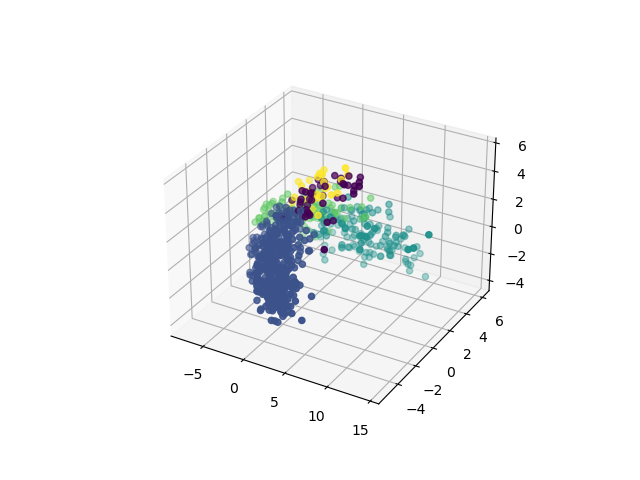

In [33]:
#cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

## Actual Species In Test Sample

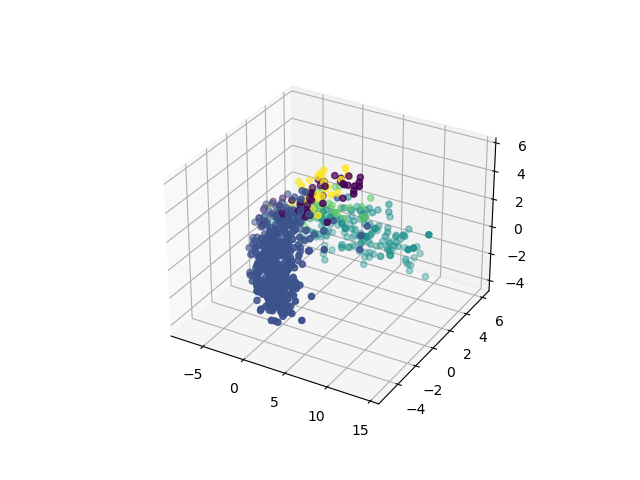

In [34]:
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
plot;

## Species Predicted != Species Labels in Test Sample

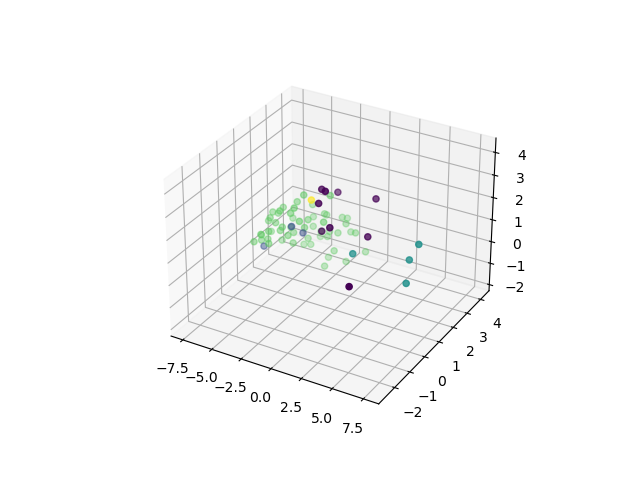

In [35]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species != pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

## Species Predicted == Species Labels

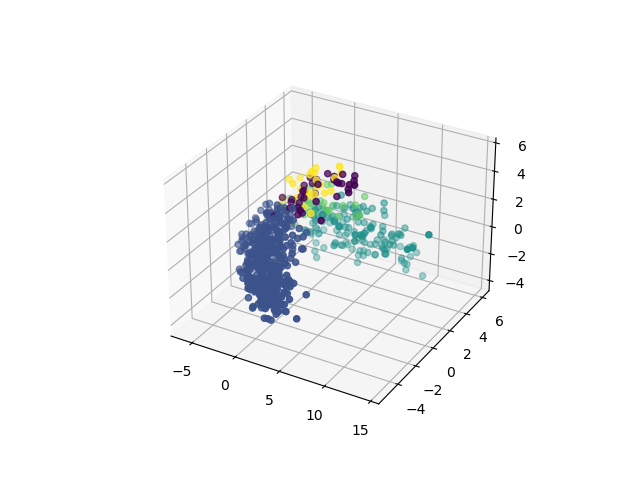

In [36]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species == pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

All Data Again


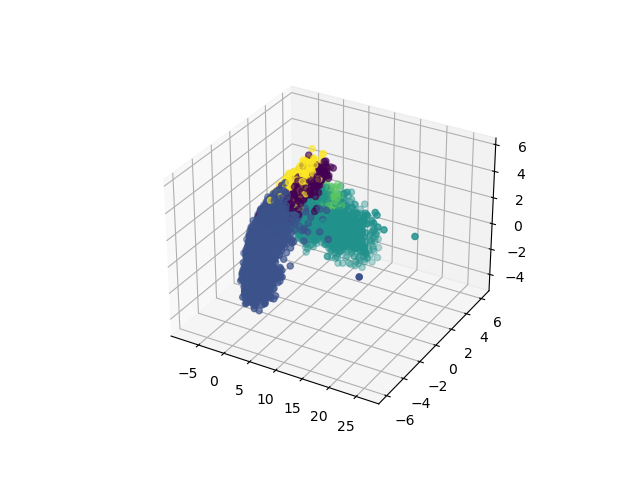

In [37]:
embeddings_to_plot = pca_embeddings
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
plot;

# Conclusion?

- Promsing sign we can use simple centorids to expand birdnet's ablity without needing to retrain birdnet
- When birds cluster together, it may confuse this algorithm